In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


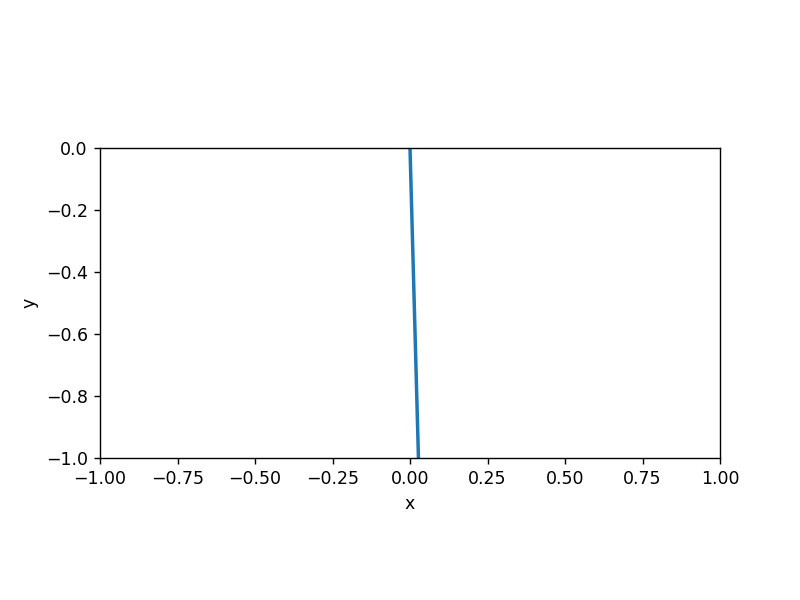

In [13]:
# Nonlinear Motion in "State Space"

# Continue with the damped, driven pendulum. Use the following block to set the problem each time:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the equation
def eqn(t, initial):
    phi=initial[0]
    phi_dot=initial[1]
    omega = 2 * np.pi
    omega_0 = 1.5 * omega

    beta = omega_0 / 4
    gamma = 0.6
    return phi_dot, -2 * beta * phi_dot - omega_0**2 * np.sin(phi) + gamma * omega_0**2 * np.cos(omega * t)

# Set the parameters
# omega = 2 * np.pi
# omega_0 = 1.5 * omega
t_max = 40
len = 1

initial_conditions = [0, 0]  # Set your initial conditions here

# Solve the equation
sol = solve_ivp(eqn, [0, t_max], initial_conditions, method='RK45', dense_output=True)


# Calculate the position of the pendulum bob
t = np.linspace(0, t_max, 500)
phi = sol.sol(t)[0]
x_bob = len * np.sin(phi)
y_bob = -len * np.cos(phi)

# Create an animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(-len, len)
ax.set_ylim(-len, 0)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(frame):
    line.set_data([0, x_bob[frame]], [0, y_bob[frame]])
    return line,

animation = FuncAnimation(fig, animate, frames=500, blit=True)

# Uncomment the following line to save the animation as a video file
# animation.save('pendulum_animation.mp4', writer='ffmpeg')

plt.show()


<IPython.core.display.Javascript object>


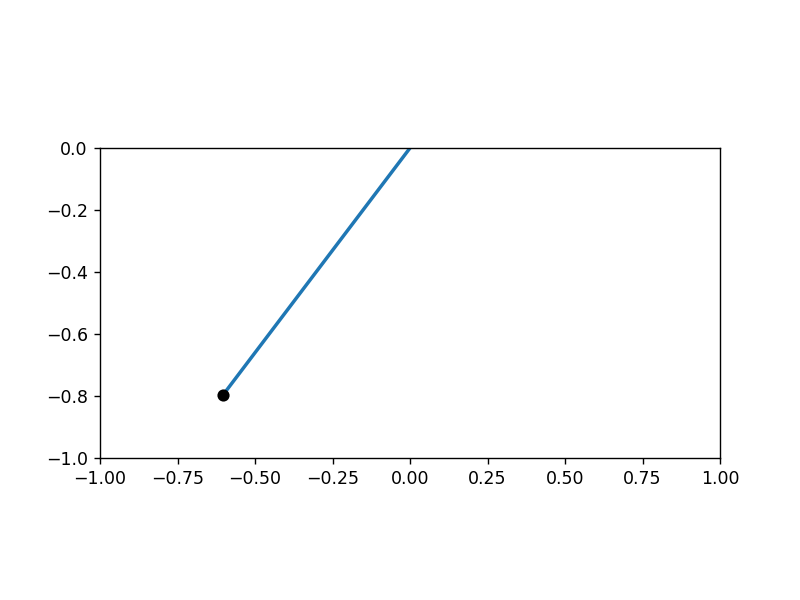

In [16]:
# The solution: Animated


# Set the parameters
len = 1
t_max = 40

# Create a figure and axes
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-len, len)
ax.set_ylim(-len, 0)
line, = ax.plot([], [], lw=2)
dot, = ax.plot([], [], 'ko')

# Animation update function
def update(time):
    x = len * np.sin(sol.sol(time)[0])
    y = -len * np.cos(sol.sol(time)[0])
    line.set_data([0, x], [0, y])
    dot.set_data(x, y)
    return line, dot

# Create the animation
animation = FuncAnimation(fig, update, frames=np.linspace(0, t_max, 500),
                          interval=1000/3, blit=True, repeat=False)

# Uncomment the following line to save the animation as a video file
# animation.save('pendulum_animation.mp4', writer='ffmpeg')

plt.show()


<IPython.core.display.Javascript object>


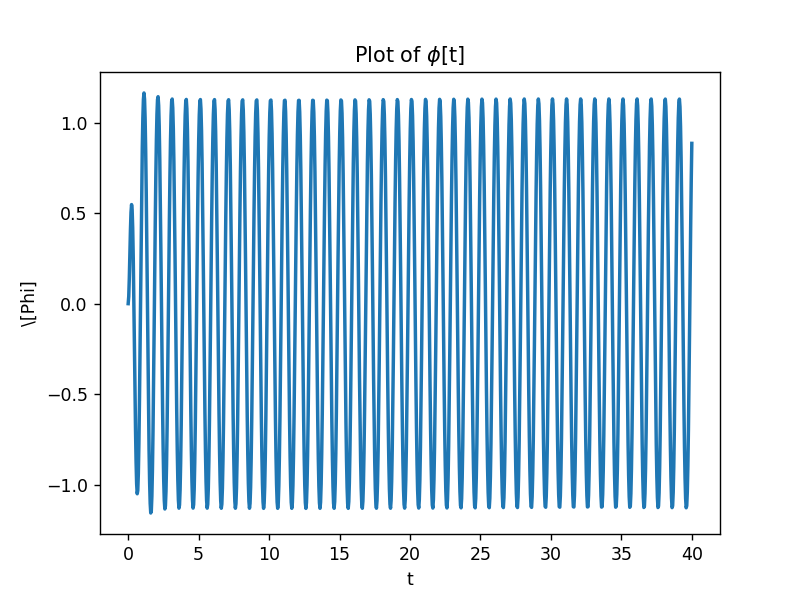

In [20]:
# The solution: Plot the angle



# Set the parameters
t_max = 40

# Generate values for t
t = np.linspace(0, t_max, 1000)

# Evaluate \[Phi][t] using the solution
phi = sol.sol(t)[0]

# Create the plot

fig,ax=plt.subplots()
plt.plot(t, phi, lw=2)

# Set plot labels and title
plt.xlabel('t')
plt.ylabel('\[Phi]')
plt.title('Plot of $\phi$[t]')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


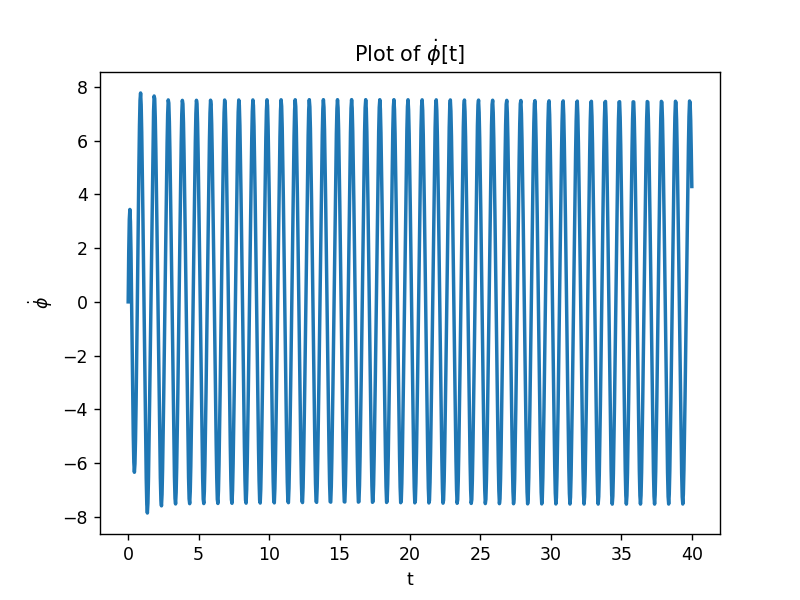

In [22]:
# The solution: Plot the angular velocity


# Set the parameters
t_max = 40

# Generate values for t
t = np.linspace(0, t_max, 1000)

# Evaluate \[Phi]'[t] using the solution
phi_prime = sol.sol(t)[1]

fig,ax=plt.subplots()

# Create the plot
plt.plot(t, phi_prime, lw=2)

# Set plot labels and title
plt.xlabel('t')
plt.ylabel('$\dot{\phi}$')
plt.title('Plot of $\dot{\phi}$[t]')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


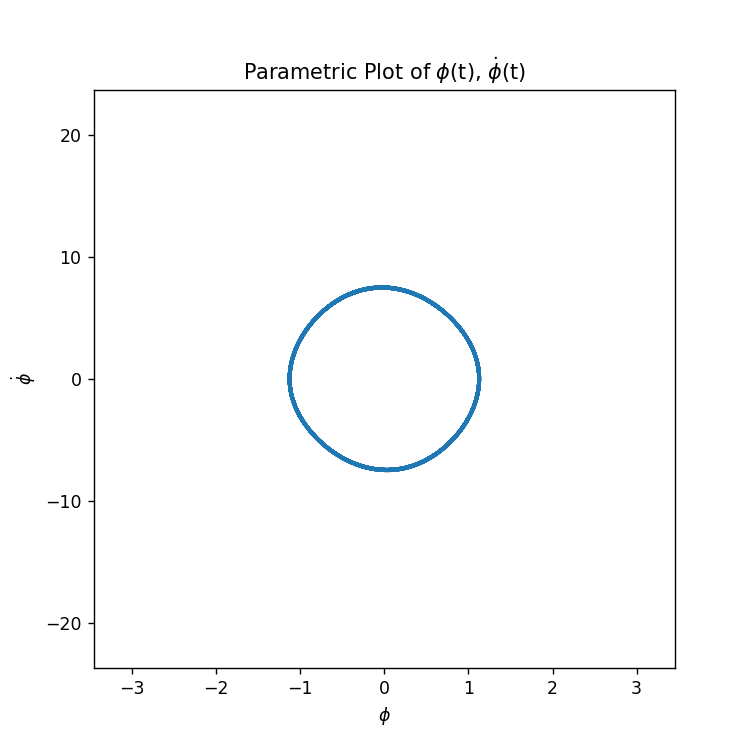

In [28]:
# The solution: Plot the State Space


# Set the parameters
t_max = 40
omega = 2 * np.pi

# Generate values for t
t = np.linspace(5, t_max, 1000)

# Evaluate \[Phi][t] and \[Phi]'[t] using the solution
phi = sol.sol(t)[0]
phi_prime = sol.sol(t)[1]


fig,ax = plt.subplots(figsize=(6,6))
# Create the parametric plot
plt.plot(phi, phi_prime, lw=2)

# Set plot limits and aspect ratio
plt.xlim(-1.1 * np.pi, 1.1 * np.pi)
plt.ylim(-1.2 * omega * np.pi, 1.2 * omega * np.pi)
# plt.gca().set_aspect(1)

# Set plot labels and title
plt.xlabel('$\phi$')
plt.ylabel('$\dot{\phi}$')
plt.title('Parametric Plot of $\phi$(t), $\dot{\phi}$(t)')

# Show the plot
plt.show()


In [ ]:
"""
These are various combinations to try

(1) \[Gamma]=\[Beta]=0 and small \[Phi][0], say \[Pi]/10: Elliptical state space orbits!
(2) Same but with large \[Phi][0], say 9\[Pi]/10
(3) Add damping  \[Beta]=\[Omega]0/4
(4) Turn on driving with \[Gamma]=0.2; reset \[Phi][0]=0
(5) Drive more strongly with \[Gamma]=0.9
(5a) Adjust tMin to 5 on state space plot: Period=1!

Now run through our "standard" period doubling cascade
(6a) \[Gamma]=1.06 and \[Phi][0]=-\[Pi]/2
(6a) \[Gamma]=1.078 and \[Phi][0]=-\[Pi]/2
(6a) \[Gamma]=1.081 and \[Phi][0]=-\[Pi]/2
(6a) \[Gamma]=1.0826 and \[Phi][0]=-\[Pi]/2 (run longer, blow up scale)

Now chaotic driving strength
(7) \[Gamma]=1.09 and \[Phi][0]=-\[Pi]/2 (run longer, blow up scale)
(8) \[Gamma]=1.105 (Taylor Fig.12.24; run w/tMax=200)
(9) \[Gamma]=1.5 and \[Beta]=\[Omega]0/8 (Taylor Fig.12.27; run w/tMax=200)
  Note: Try Mod[\[Phi],2\[Pi]] for "rolling" motion
"""